**## INTRODUCTION**


This analysis aims to develop a Predictive Lead Scoring model to evaluate and rank leads based on their conversion potential. By leveraging data-driven insights, the model will enable the sales team to focus on high-priority leads, optimizing their efforts and resources to drive better outcomes.

The model's primary objective is to estimate the probability of conversion for each lead, categorizing them into "High," "Medium," or "Low" likelihood groups. This structured approach enhances lead prioritization and ensures a more efficient and targeted sales process.

Ultimately, this analysis is expected to significantly improve conversion rates by aligning sales efforts with the most promising opportunities, thereby enhancing operational efficiency and supporting sustained business growth.

**Steps Taken to Build the Model**

**Data Preprocessing**

-Addressed missing values

-Managed outliers

-Checked for duplicates

**Exploratory Data Analysis (EDA)**

-Analyzed the data to uncover and understand patterns

**Feature Engineering**

-Encoded categorical features

-Created a Time-to-Start column

-Analyzed the sentiment of texts, then created Sentiment Category and Sentiment Score columns

-Applied TF-IDF to convert text data into numerical features

-Used K-Means clustering to group similar texts and added the resulting cluster labels as a new feature

**Model Training**

-Selected label and feature variables

-Applied Supervised Learning: Trained classifiers (Logistic Regression, Random Forest, Decision Tree) using the engineered features

-Hyperparameter Tuning: Optimized model parameters using GridSearchCV or RandomizedSearchCV

**Model Evaluation**

-Performed Train-Test Split: Split the dataset into training and testing sets.

-Calculated model accuracy on both training and testing data.

-Assessed model performance using metrics such as accuracy, precision, recall, and F1-score.

**-Predictive Scoring for All Classes** :Generated predictive scores for each sentiment class.

**Feature Importance Analysis** :Used SHAP (Shapley Additive Explanations) to assess feature importance

**Conclusion and Observations** :Summarized key findings and noted areas for improvement

In [ ]:
# Importing some necessary Libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading the excel data file into python for analysis
nebiant_df = pd.read_excel('/content/Nebiant Analytics Lead Generation Dataset - For Dashboard (1).xlsx')
nebiant_df.head()


,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,Comments,Feedback
0,Data Science,14/07/2024 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,Male,Kenya,Facebook,09/07/2024,Danjuma,Send WA message,Not Provided
1,Data Science,14/07/2024 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,Male,Nigeria,Facebook,08/03/2024,Danjuma,Interested in the da path,Follow Up
2,Data Science,14/07/2024 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,Male,Nigeria,Facebook,08/03/2024,Danjuma,Can't afford the price,Can't Pay
3,Data Science,14/07/2024 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,Male,Ghana,Facebook,08/03/2024,Danjuma,"Should check back before the end of today, int...",Follow Up
4,Data Science,14/07/2024 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,Male,Kenya,Facebook,08/03/2024,Danjuma,"Checking the brochure and registration link, t...",Follow Up


 Understanding the dataset

In [ ]:
nebiant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Program              688 non-null    object
 1   Timestamp            688 non-null    object
 2   Email Address        687 non-null    object
 3   Name                 688 non-null    object
 4   Phone Number         688 non-null    object
 5   Gender               688 non-null    object
 6   Location (Country)   688 non-null    object
 7   Lead Source          688 non-null    object
 8   Training Start Date  688 non-null    object
 9   Lead Manager         688 non-null    object
 10  Comments             688 non-null    object
 11  Feedback             687 non-null    object
dtypes: object(12)
memory usage: 64.6+ KB


In [ ]:
nebiant_df.describe()

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,Comments,Feedback
count,688,688,687,688,688,688,688,688,688,688,688,687
unique,3,679,619,614,684,3,12,6,6,4,188,8
top,Data Analytics,14/07/2024 18:37:45,ifeoluwagideon@gmail.com,Afees Adelaja,233207447447,Male,Nigeria,Facebook,10/05/2024,Unassigned,Not provided,Not Provided
freq,406,2,3,4,2,418,520,390,239,401,392,432


In [ ]:
nebiant_df.shape

(688, 12)

**Checking out for Missing Values**

In [ ]:
nebiant_df.isna().sum()

,0
Program,0
Timestamp,0
Email Address,1
Name,0
Phone Number,0
Gender,0
Location (Country),0
Lead Source,0
Training Start Date,0
Lead Manager,0


**Filling the Missing Values**

In [ ]:
nebiant_df.fillna({'Email Address': '[No Email]'}, inplace=True)



In [ ]:
nebiant_df.fillna({'Feedback': '[No Feedback]'}, inplace=True)


In [ ]:
nebiant_df.duplicated().sum()


0

In [ ]:
nebiant_df.head()


,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,Comments,Feedback
0,Data Science,14/07/2024 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,Male,Kenya,Facebook,09/07/2024,Danjuma,Send WA message,Not Provided
1,Data Science,14/07/2024 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,Male,Nigeria,Facebook,08/03/2024,Danjuma,Interested in the da path,Follow Up
2,Data Science,14/07/2024 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,Male,Nigeria,Facebook,08/03/2024,Danjuma,Can't afford the price,Can't Pay
3,Data Science,14/07/2024 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,Male,Ghana,Facebook,08/03/2024,Danjuma,"Should check back before the end of today, int...",Follow Up
4,Data Science,14/07/2024 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,Male,Kenya,Facebook,08/03/2024,Danjuma,"Checking the brochure and registration link, t...",Follow Up


**Checking for Outliers in Timestamp column**

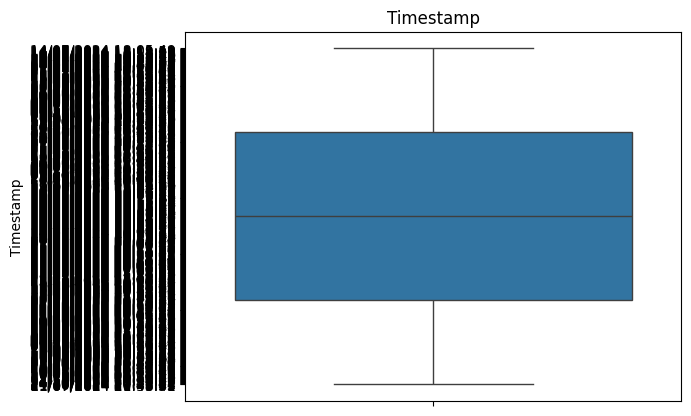

In [ ]:
sns.boxplot(y=nebiant_df['Timestamp'])  # Use 'y' instead of 'x'
plt.title("Timestamp")
plt.show()

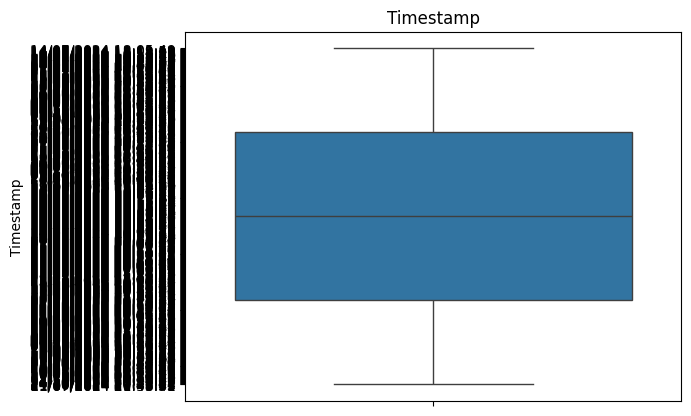

In [ ]:
sns.boxplot(nebiant_df["Timestamp"])
plt.title("Timestamp")
plt.show()

In [ ]:
Q1 = nebiant_df["Timestamp"].quantile(0.25)
Q3 = nebiant_df["Timestamp"].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

nebiant_df = nebiant_df[(nebiant_df["Timestamp"] >= lower_bound) & (nebiant_df["Timestamp"] <= upper_bound)]

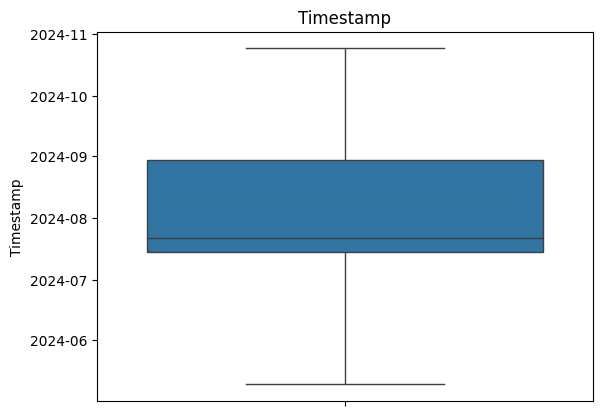

In [ ]:
sns.boxplot(nebiant_df['Timestamp'])
plt.title("Timestamp")
plt.show()

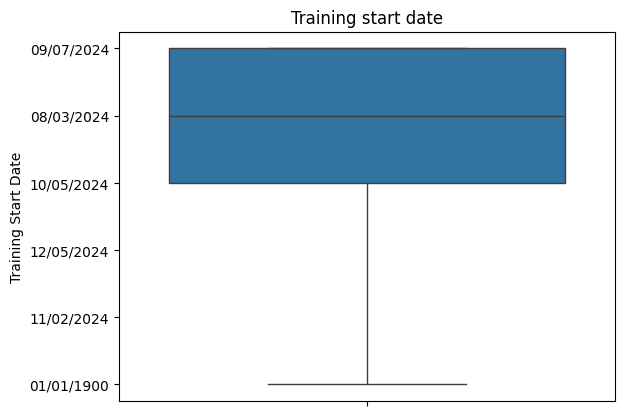

In [ ]:
sns.boxplot(nebiant_df['Training Start Date'])
plt.title("Training start date")
plt.show()


The box plot reveals a record from the year 1900, which is an outlier. As a result, it will be removed.

In [ ]:
nebiant_df = nebiant_df[nebiant_df["Training Start Date"] > nebiant_df["Training Start Date"].min()]

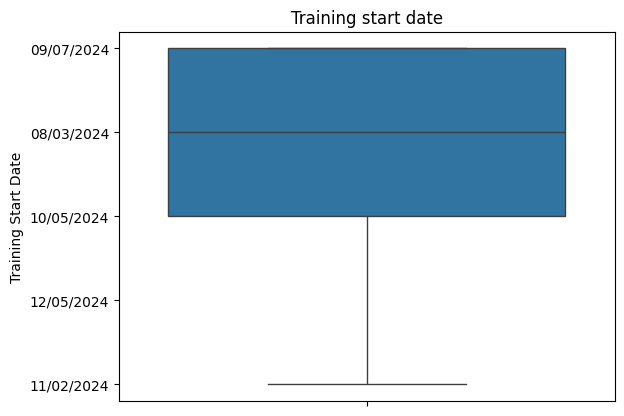

In [ ]:
sns.boxplot(nebiant_df['Training Start Date'])
plt.title("Training start date")
plt.show()

**Performing Exploratory Data Analysis [EDA]**

**Univariate Analysis**

<ipython-input-30-a283311e78af>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  nebiant_df['Timestamp'] = pd.to_datetime(nebiant_df['Timestamp'], errors='coerce')


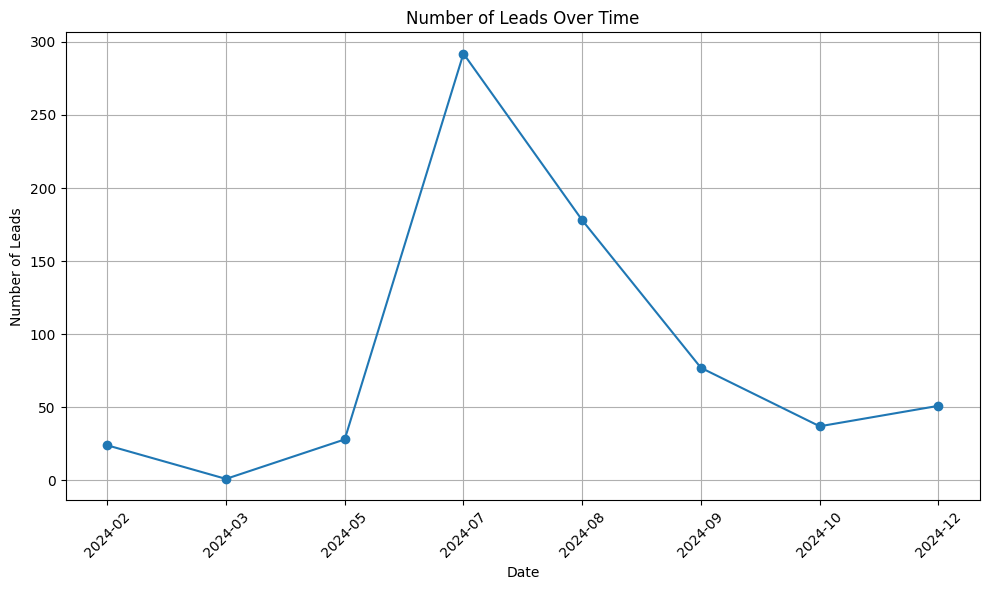

In [ ]:
# Convert 'Timestamp' column to datetime objects if it's not already
nebiant_df['Timestamp'] = pd.to_datetime(nebiant_df['Timestamp'], errors='coerce')

# Group by month and get the count of leads
nebiant_df['Date'] = nebiant_df['Timestamp'].dt.to_period('M')  # Convert to Period for grouping by month
program_leads = nebiant_df.groupby(['Date']).size().reset_index(name='Lead Count')

# Convert Period to string for plotting
program_leads['Date'] = program_leads['Date'].astype(str)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(program_leads["Date"], program_leads["Lead Count"], marker='o', label='Lead Count')

plt.title('Number of Leads Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

-The data contains leads generated from February 2024 to December 2024.

-The number of leads showed an exponential increase in July 2024, reaching almost 300. However, the trend has since declined significantly over the following months.

In [ ]:
#checking the total number of male and female
nebiant_df["Gender"].value_counts()

,count
Gender,
Male,381
Female,230


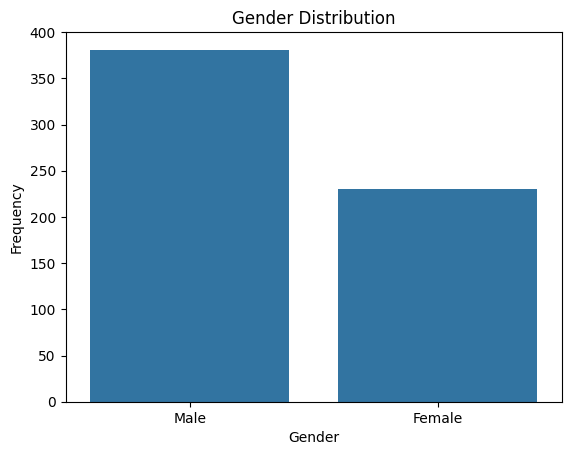

In [ ]:
## Countplot of gender

sns.countplot(data = nebiant_df, x = "Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Gender Distribution")
plt.show()

TRANSLATION:

This plot explaines that generally the frequency of the male gender is higher than the females although no way to know their age grade.

In [ ]:
#To check the count of leads across the different location
Location_Country_counts = nebiant_df["Location (Country)"].value_counts()
print(Location_Country_counts)

Location (Country)
Nigeria            452
Ghana               84
Kenya               57
Rwanda               5
Estonia              3
Zambia               3
United Kingdom       2
South Africa         2
North Macedonia      1
Belgium              1
Benin                1
Name: count, dtype: int64


In [ ]:
#To check the count of Lead Source
nebiant_df["Lead Source"].value_counts()

,count
Lead Source,
Facebook,361
Instagram,113
Linkedin,64
Referral,62
Lemuel,11


In [ ]:
#To check the count of leads across the different department
nebiant_df["Program"].value_counts()

,count
Program,
Data Analytics,380
Data Science,140
Business Analysis,91


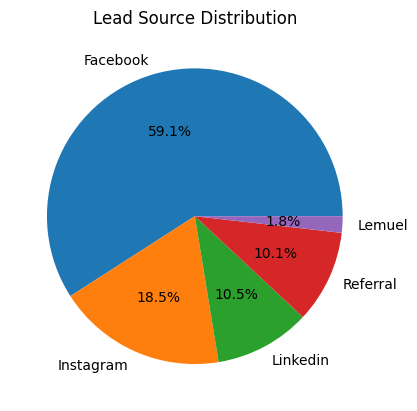

In [ ]:
#To see the pencentage of each Lead Source with a pieplot
Lead_Source_counts = nebiant_df["Lead Source"].value_counts()
plt.pie(Lead_Source_counts, labels=Lead_Source_counts.index, autopct='%1.1f%%')
plt.title("Lead Source Distribution")
plt.show()

TRANSLATION:

The pie chart explains that the lead source at which the organization (NEBIANT ANALYTICS) and the programs offered is been seen by the audience is via Facebook (59.1%), then Instagram(18.5%), then Linkedin(10.5%), followed by Referrals (10.1%) and then by Lemuel (1.8%). This chart has indeed highlighted the weakest and greatest mode of advertisement

In [ ]:
## Lead Manager
print(nebiant_df["Lead Manager"].value_counts())


Lead Manager
Unassigned    324
Danjuma       130
Adeola         96
Chimamanda     61
Name: count, dtype: int64


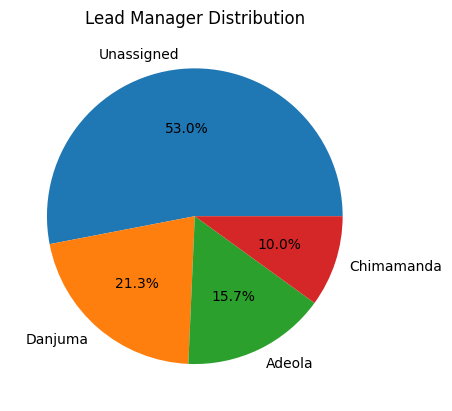

In [ ]:
# plot of lead manager

Course_of_study_counts = nebiant_df["Lead Manager"].value_counts()
plt.pie(Course_of_study_counts, labels=Course_of_study_counts.index, autopct='%1.1f%%')
plt.title("Lead Manager Distribution")
plt.show()

The plot highlights the percentage of leads assigned to the lead managers and more than half of these leads are unassigned to any lead manager.

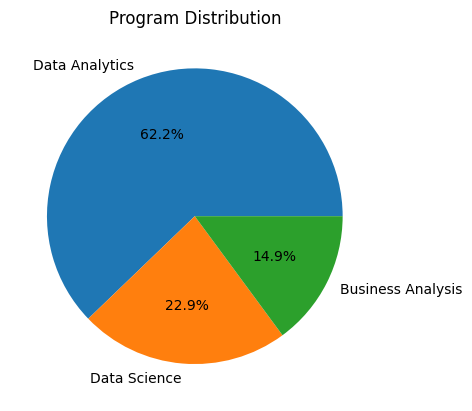

In [ ]:
#To see the pencentage of Lead across the different departments using a pieplot
Course_of_study_counts = nebiant_df["Program"].value_counts()
plt.pie(Course_of_study_counts, labels=Course_of_study_counts.index, autopct='%1.1f%%')
plt.title("Program Distribution")
plt.show()

TRANSLATION:

This plot highlights the percentage of prospects that applies for the different courses of study with Data Analytics topping the list with 62.2%, Data Science with 22.9% and Business Analysis 14.9%.

**Bivariate Analysis**

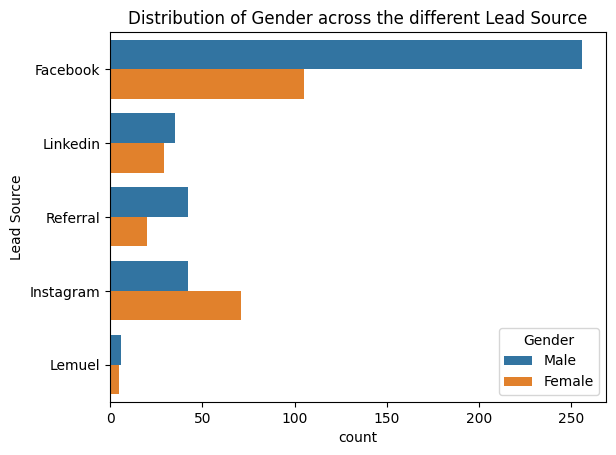

In [ ]:
sns.countplot(data= nebiant_df, y="Lead Source", hue = "Gender")
plt.title("Distribution of Gender across the different Lead Source")
plt.show()

Facebook platform gives majority of prospective students which are male, while Instagram attracts more female prospects.

LinkedIn, Lemel Yole Odior as well as prospectives under Referral are more of males than females.



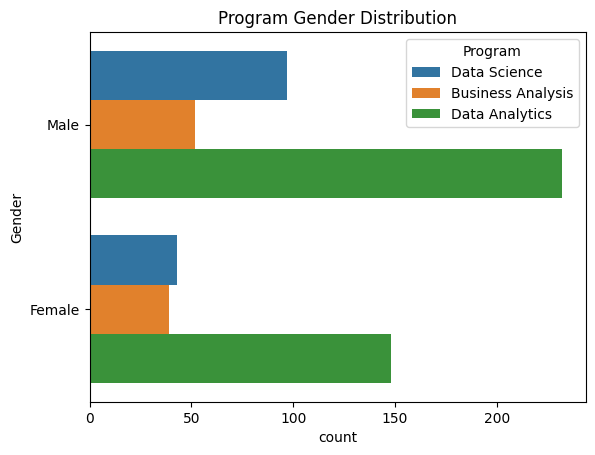

In [ ]:
sns.countplot(data = nebiant_df, y="Gender", hue = "Program")
plt.title("Program Gender Distribution")
plt.show()

Both genders prospects are available across the different Programs and follow the same sequence i.e. there are more indication of interest in Data Analytics followed by Data Science, and then Business Analysis.

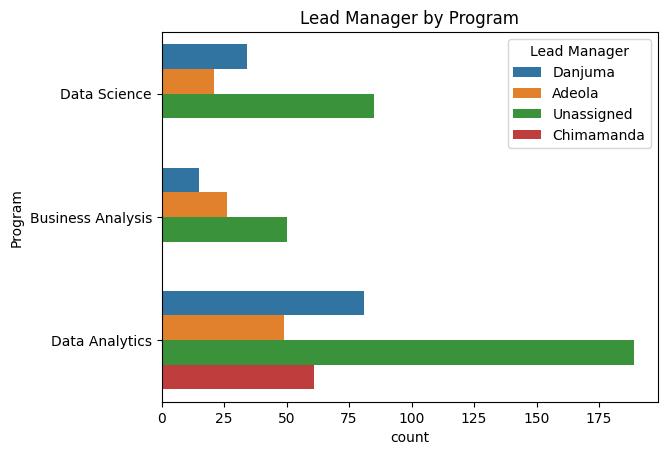

In [ ]:
sns.countplot(data = nebiant_df, y="Program", hue = "Lead Manager")
plt.title("Lead Manager by Program")
plt.show()

Most of the prospects in this dataset are not assigned to any managers

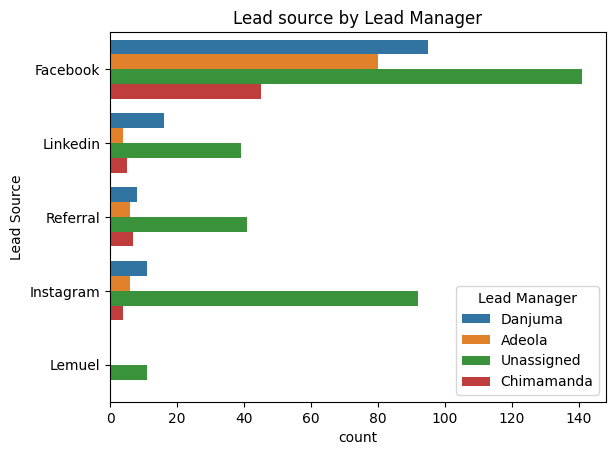

In [ ]:
sns.countplot(data = nebiant_df, y="Lead Source", hue = "Lead Manager")
plt.title("Lead source by Lead Manager")
plt.show()

A high number of prospects from the different sources in this dataset are not assigned to any managers

**Multivariate Analysis**

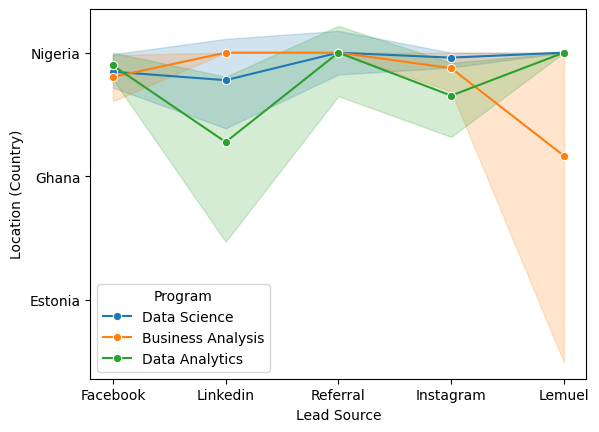

In [ ]:
sns.lineplot(data = nebiant_df, x ="Lead Source", y= "Location (Country)", hue = "Program", marker = "o")
plt.show()

TRANSLATION:

This lineplot shows across different lead sources the distribution of prospects across various countries. The hue parameter indicates each prospect's program of interest.

Business Analysis: Prospects are highest from the country Nigeria and with lead source Referral and Instagram.

Data Science: Prospects are highest from the country Nigeria and with lead source Lemuel and Instagram.

Data Analysis: Prospects are highest from the country Nigeria and with lead source Referral and Lemuel.

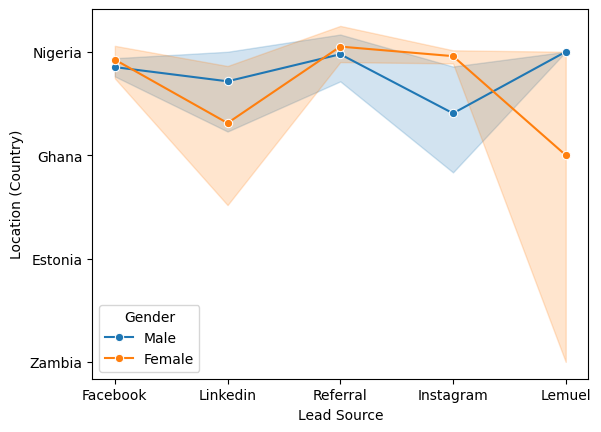

In [ ]:
sns.lineplot(data = nebiant_df, x ="Lead Source", y= "Location (Country)", hue = "Gender", marker = "o")
plt.show()


TRANSLATION:

This lineplot shows the high/low number of the gender of prospects across the different lead sources and countries. The hue parameter is the gender of each prospects.

MALES: The male prospects are highest from the country Nigeria with highest lead sources Referral and Lemuel.

FEMALES: The female prospects are highest from the country Nigeria with highest lead sources Referral and Instagram.

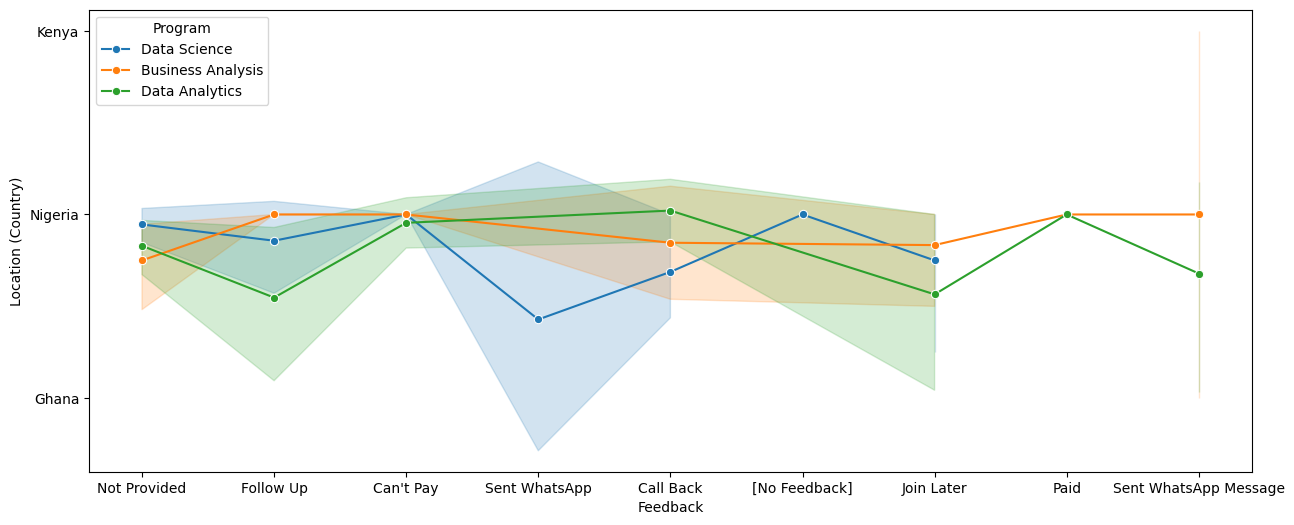

In [ ]:
plt.figure(figsize =(15, 6))
sns.lineplot(data = nebiant_df, x ="Feedback", y= "Location (Country)", hue = "Program", marker = "o")
plt.show()

TRANSLATION:

This lineplot shows the different Feedbacks given by prospects across various countries. The hue parameter is department.

Business Analysis: Prospects are highest from the country Nigeria giving the most feedback 'can't pay', 'follow up' and 'sent whatsapp message'.

Data Science: Prospects are highest from the country Nigeria giving the most feedback 'No data', 'cant't pay' and 'Not provided'.

Data Analysis: Prospects are highest from the country Nigeria giving the most feedback 'call back', 'paid' and 'can't pay'.

**Feature Engineering**

The essence of 'feature engineering' lies in creating, transforming, or even selecting the most relevant informative features from our dataset (in this case nebiant_df) to improve its performance during machine learning model (This will be done later). The quality of features directly impacts the predictive power of a model.

In [ ]:
## Checking my dataset
nebiant_df.head()

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,Comments,Feedback,Date
0,Data Science,2024-07-14 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,Male,Kenya,Facebook,09/07/2024,Danjuma,Send WA message,Not Provided,2024-07
1,Data Science,2024-07-14 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,Male,Nigeria,Facebook,08/03/2024,Danjuma,Interested in the da path,Follow Up,2024-07
2,Data Science,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,Male,Nigeria,Facebook,08/03/2024,Danjuma,Can't afford the price,Can't Pay,2024-07
3,Data Science,2024-07-14 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,Male,Ghana,Facebook,08/03/2024,Danjuma,"Should check back before the end of today, int...",Follow Up,2024-07
4,Data Science,2024-07-14 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,Male,Kenya,Facebook,08/03/2024,Danjuma,"Checking the brochure and registration link, t...",Follow Up,2024-07


**Transforming Comments and Feedback into Sentiment Scores**: This is creation of a relevant column

In [ ]:
## importing the necessary library for the column creation
from textblob import TextBlob

In [ ]:
nebiant_df["Comments Sentiment Score"] = nebiant_df["Comments"].astype(str)
nebiant_df["Comments Sentiment"] = nebiant_df["Comments Sentiment Score"].apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
nebiant_df["Feedback Sentiment Score"] = nebiant_df["Feedback"].astype(str)
nebiant_df["Feedback Sentiment"] = nebiant_df["Feedback Sentiment Score"].apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
## To see if the dataset has effected the code
nebiant_df.head()

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,Comments,Feedback,Date,Comments Sentiment Score,Comments Sentiment,Feedback Sentiment Score,Feedback Sentiment
0,Data Science,2024-07-14 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,Male,Kenya,Facebook,09/07/2024,Danjuma,Send WA message,Not Provided,2024-07,Send WA message,0.000,Not Provided,0.0
1,Data Science,2024-07-14 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,Male,Nigeria,Facebook,08/03/2024,Danjuma,Interested in the da path,Follow Up,2024-07,Interested in the da path,0.250,Follow Up,0.0
2,Data Science,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,Male,Nigeria,Facebook,08/03/2024,Danjuma,Can't afford the price,Can't Pay,2024-07,Can't afford the price,0.000,Can't Pay,0.0
3,Data Science,2024-07-14 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,Male,Ghana,Facebook,08/03/2024,Danjuma,"Should check back before the end of today, int...",Follow Up,2024-07,"Should check back before the end of today, int...",0.125,Follow Up,0.0
4,Data Science,2024-07-14 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,Male,Kenya,Facebook,08/03/2024,Danjuma,"Checking the brochure and registration link, t...",Follow Up,2024-07,"Checking the brochure and registration link, t...",0.000,Follow Up,0.0


In [ ]:

nebiant_df["Comments Sentiment Score"] = nebiant_df["Comments Sentiment"].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
nebiant_df["Feedback Sentiment Score"] = nebiant_df["Feedback Sentiment"].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [ ]:
## To see if the dataset has effected the above code
nebiant_df.head()

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,Comments,Feedback,Date,Comments Sentiment Score,Comments Sentiment,Feedback Sentiment Score,Feedback Sentiment
0,Data Science,2024-07-14 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,Male,Kenya,Facebook,09/07/2024,Danjuma,Send WA message,Not Provided,2024-07,Neutral,0.000,Neutral,0.0
1,Data Science,2024-07-14 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,Male,Nigeria,Facebook,08/03/2024,Danjuma,Interested in the da path,Follow Up,2024-07,Positive,0.250,Neutral,0.0
2,Data Science,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,Male,Nigeria,Facebook,08/03/2024,Danjuma,Can't afford the price,Can't Pay,2024-07,Neutral,0.000,Neutral,0.0
3,Data Science,2024-07-14 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,Male,Ghana,Facebook,08/03/2024,Danjuma,"Should check back before the end of today, int...",Follow Up,2024-07,Positive,0.125,Neutral,0.0
4,Data Science,2024-07-14 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,Male,Kenya,Facebook,08/03/2024,Danjuma,"Checking the brochure and registration link, t...",Follow Up,2024-07,Neutral,0.000,Neutral,0.0


In [ ]:
# Comments as regards what Sentiment Score they have
display (nebiant_df[["Comments Sentiment Score", "Comments"]].head(25))
pd.set_option('display.max_colwidth', 100)


,Comments Sentiment Score,Comments
0,Neutral,Send WA message
1,Positive,Interested in the da path
2,Neutral,Can't afford the price
3,Positive,"Should check back before the end of today, int..."
4,Neutral,"Checking the brochure and registration link, t..."
5,Neutral,"Called on WA, N/A, dropped a mesage to call back"
6,Negative,"Contact not available on WA, foreign number"
7,Neutral,"Called on WA, N/A, dropped a mesage to call back"
8,Neutral,At 5pm kenya time
9,Neutral,Can't afford the price


In [ ]:
# Import necessary libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Select only the relevant columns for clustering
nebiant_df = nebiant_df[["Comments", "Comments Sentiment Score"]]

NameError: name 'nebiant_df' is not defined

In [ ]:
# Preview the selected data
print(nebiant_df_subset.head())

                                                            Comments  \
0                                                    Send WA message   
1                                          Interested in the da path   
2                                             Can't afford the price   
3        Should check back before the end of today, interested in ds   
4  Checking the brochure and registration link, to check back today.   

  Comments Sentiment Score  
0                  Neutral  
1                 Positive  
2                  Neutral  
3                 Positive  
4                  Neutral  


In [ ]:
 # Extracting the 'Comments'column to verify the first few comments
comments = nebiant_df_subset["Comments"]
print(comments.head())


0                                                      Send WA message
1                                            Interested in the da path
2                                               Can't afford the price
3          Should check back before the end of today, interested in ds
4    Checking the brochure and registration link, to check back today.
Name: Comments, dtype: object


In [ ]:
# Preprocess the text (basic cleaning)
nebiant_df["Comments"] = nebiant_df["Comments"].str.lower()


NameError: name 'nebiant_df' is not defined

In [ ]:
# Convert comments to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=100)
X = vectorizer.fit_transform(nebiant_df_subset["Comments"])


In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
nebiant_df_subset["Cluster"] = kmeans.fit_predict(X)

<ipython-input-80-e3a648409ac0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nebiant_df_subset["Cluster"] = kmeans.fit_predict(X)


In [ ]:
# Visualize clusters
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())


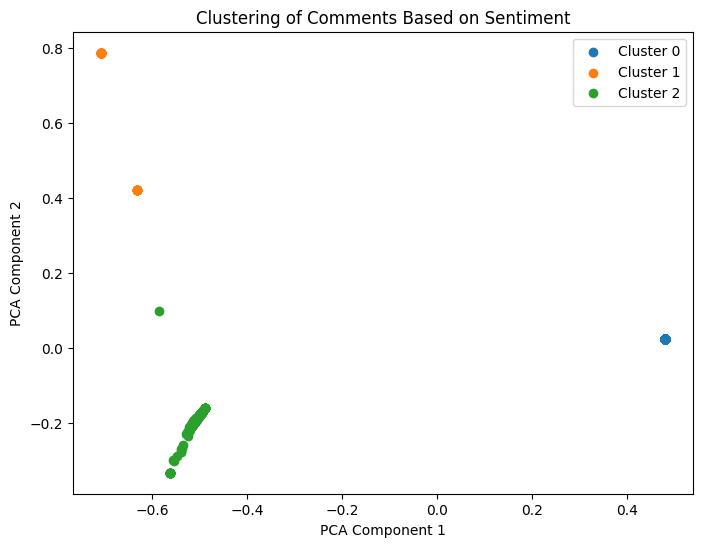

In [ ]:
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = reduced_data[nebiant_df_subset["Cluster"] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster}")

plt.title("Clustering of Comments Based on Sentiment")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

- Tightly packed clusters: This indicates that the comments in the cluster are very similar in meaning or sentiment.


- Distance between clusters: Clusters far apart indicate significant differences between groups. It further confirms distinctiveness in sentiment or themes.

**Analysis for Each Sentiment**

**Cluster: Positive**

**Example Comments:**

"Interested in the data path"

"Should check back before the end of today"

"Interested in paying the installment but need clarification"

"Busy at the moment, to check back later"

"Interested, still sourcing for money"


**Themes in Positive Sentiment:**

Interest in participation: Many of these comments express interest in the program (e.g., "Interested in the data path," "Interested in paying").

Need for follow-up: Several comments indicate the need for follow-up action, such as checking back later or sourcing money.

**Key Theme:**

Interest but requires additional support (e.g., clarification, timing, or financing).

**Cluster: Neutral**

**Example Comments:**

"Can't afford the price"

"Called on WA, N/A, dropped a message to call back"

"Checking the brochure and registration link"

"At 5pm Kenya time"

"Call back 10:30 am Ghana time"


**Themes in Neutral Sentiment:**

Price concerns: Many comments mention affordability issues (e.g., "Can't afford the price").

Awaiting response: Several comments highlight failed contact attempts (e.g., "Called on WA, N/A").

**Exploration phase:** Comments indicate participants are still in the exploration phase, such as reviewing brochures or checking details.

**Key Theme:**

Exploring options, awaiting clarification, or facing logistical/financial constraints.


**Cluster: Negative**

**Example Comments:**

"Contact not available on WA, foreign number"

"Foreign number, not picking calls. Sent a message"

**Themes in Negative Sentiment:**

Communication issues: Comments reflect challenges in communication, such as inability to reach participants on WhatsApp or foreign numbers not responding.

**Key Theme:**
Frustration due to poor communication or unresponsive contacts.


**Cluster	Sentiment	Theme**

**Cluster 0	Positive**:	Interest in participation but requires support (e.g., finances).

**Cluster 1	Neutral**:	Exploring options, logistical/financial constraints, or waiting.

**Cluster 2	Negative**:	Frustration due to communication barriers or unavailability.

**How This Links to Business Insights**

**Positive Cluster:**: Focus on nurturing these leads with follow-ups or providing clarity about the program and payment options.

**Neutral Cluster:** Address price concerns and improve communication by being proactive (e.g., sending reminders or alternative contact options).

**Negative Cluster:** Fix technical issues like unresponsive foreign numbers and strengthen the contact process (e.g., ensuring WhatsApp availability).

In [ ]:
# Display final dataset with clusters
print(nebiant_df_subset)

                                                              Comments  \
0                                                      send wa message   
1                                            interested in the da path   
2                                               can't afford the price   
3          should check back before the end of today, interested in ds   
4    checking the brochure and registration link, to check back today.   
..                                                                 ...   
683                                                       not provided   
684                                                       not provided   
685                                                       not provided   
686                                                       not provided   
687                                                       not provided   

    Comments Sentiment Score  Cluster  
0                    Neutral        2  
1                   Positive   

In [ ]:
## Assign cluster labels based on interpretation
cluster_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
nebiant_df_subset["Cluster Label"] = nebiant_df_subset["Cluster"].map(cluster_mapping)

<ipython-input-84-744ffd7d5605>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nebiant_df_subset["Cluster Label"] = nebiant_df_subset["Cluster"].map(cluster_mapping)


In [ ]:
# Check how the comments are categorized
print(nebiant_df_subset[["Comments", "Comments Sentiment Score", "Cluster Label"]].head())


                                                            Comments  \
0                                                    send wa message   
1                                          interested in the da path   
2                                             can't afford the price   
3        should check back before the end of today, interested in ds   
4  checking the brochure and registration link, to check back today.   

  Comments Sentiment Score Cluster Label  
0                  Neutral      Positive  
1                 Positive      Positive  
2                  Neutral      Positive  
3                 Positive      Positive  
4                  Neutral      Positive  


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
for cluster_id in range(3):
    cluster_comments = nebiant_df_subset[nebiant_df_subset["Cluster"] == cluster_id]["Comments"]
    vectorizer = CountVectorizer(stop_words="english")
    word_matrix = vectorizer.fit_transform(cluster_comments)
    word_freq = word_matrix.sum(axis=0)
    words = vectorizer.get_feature_names_out()
    print(f"Top words in Cluster {cluster_id}:")
    print(sorted(zip(words, word_freq.A1), key=lambda x: x[1], reverse=True)[:10])

Top words in Cluster 0:
[('provided', 326)]
Top words in Cluster 1:
[('picking', 54), ('calls', 8)]
Top words in Cluster 2:
[('afford', 26), ('join', 20), ('wa', 13), ('wants', 12), ('later', 11), ('sent', 11), ('available', 10), ('brochure', 10), ('busy', 10), ('check', 10)]


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, nebiant_df_subset['Cluster'])
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.62


Silhouette 0.62, Indicates moderate clustering. The clusters are reasonably well-defined but might have some overlap or noise.

In [ ]:
# Filter for leads with negative or neutral comments
filtered_leads = nebiant_df[
    nebiant_df['Comments Sentiment Score'].isin(['Negative', 'Neutral'])
]

In [ ]:
filtered_leads['Converted'] = filtered_leads['Lead Manager'].apply(lambda x: 1 if x == 'Won' else 0)

<ipython-input-88-4622eedc64c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_leads['Converted'] = filtered_leads['Lead Manager'].apply(lambda x: 1 if x == 'Won' else 0)


In [ ]:
# Group by Lead Manager and calculate conversion rates
conversion_rates = filtered_leads.groupby('Lead Manager')['Converted'].mean()


In [ ]:
# Display conversion rates
display(conversion_rates)

,Converted
Lead Manager,
Adeola,0.0
Chimamanda,0.0
Danjuma,0.0
Unassigned,0.0


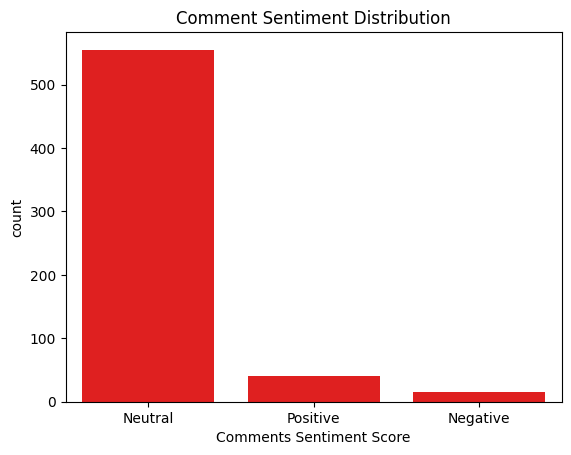

In [ ]:
sns.countplot(data=nebiant_df, x="Comments Sentiment Score", color="red")
plt.title("Comment Sentiment Distribution")
plt.show()

In [ ]:
nebiant_df['Comments Sentiment Score'].value_counts()

,count
Comments Sentiment Score,
Neutral,555
Positive,40
Negative,16


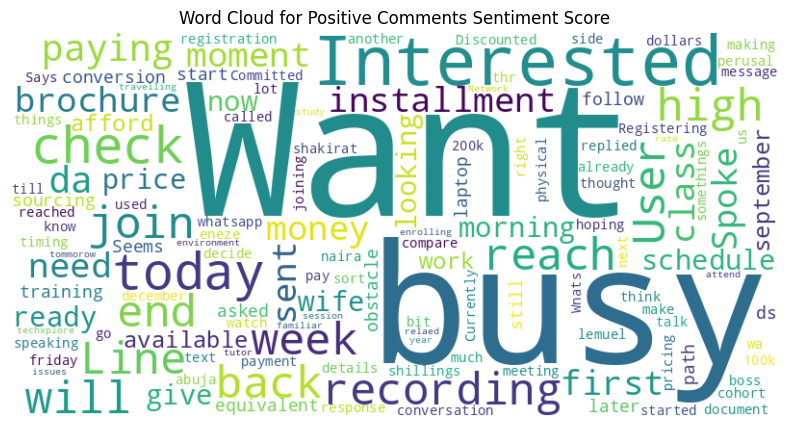

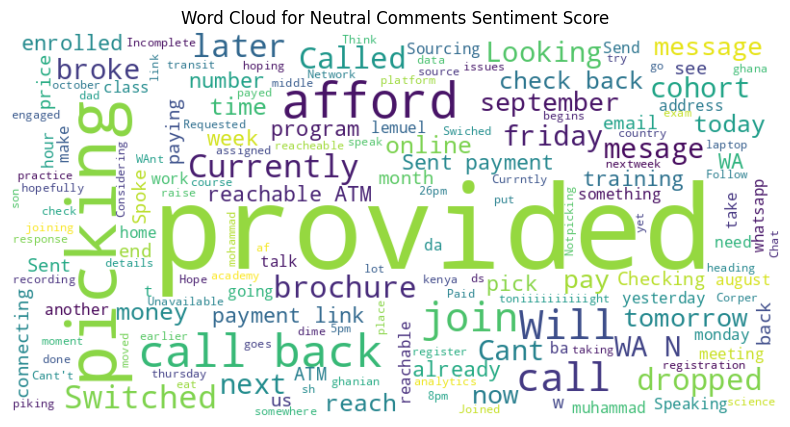

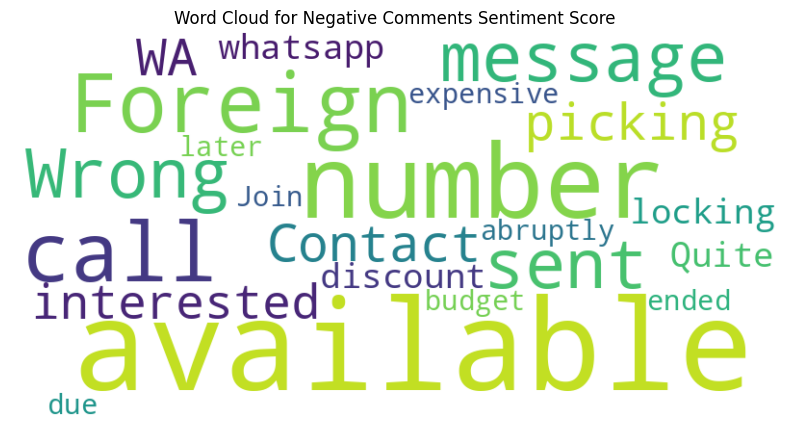

In [ ]:
### Creating word clouds to show the frequency of words that denotes conversion
from wordcloud import WordCloud

# Generate word clouds for each sentiment category
def generate_word_cloud(sentiment):
    # Use 'Comments' column instead of 'merged_text'
    text = " ".join(nebiant_df[nebiant_df['Comments Sentiment Score'] == sentiment]['Comments'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Comments Sentiment Score')
    plt.show()

# Generate word clouds for Positive, Neutral, and Negative
for sentiment in ['Positive', 'Neutral', 'Negative']:
    generate_word_cloud(sentiment)

In [ ]:
nebiant_df['Comments'] = nebiant_df['Comments'].str.lower().str.strip()

In [ ]:
# Clean 'Comments' in both DataFrames

nebiant_df_subset['Comments'] = nebiant_df_subset['Comments'].str.lower().str.strip()

# Merge the 'Cluster' and 'Cluster Label' columns into nebiant_df
nebiant_df = pd.merge(nebiant_df, nebiant_df_subset[['Comments', 'Cluster', 'Cluster Label']], on='Comments', how='left')

NameError: name 'nebiant_df_subset' is not defined

In [ ]:
nebiant_df.head(25)

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,...,Date,Comments Sentiment Score,Comments Sentiment,Feedback Sentiment Score,Feedback Sentiment,Time_to_Start,Cluster_x,Cluster Label_x,Cluster_y,Cluster Label_y
0,Data Science,2024-07-14 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,Male,Kenya,Facebook,2024-09-07,2,...,2024-07,Neutral,0.0000,Neutral,0.0,54,NaN,NaN,2,Positive
1,Data Science,2024-07-14 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,Male,Nigeria,Facebook,2024-08-03,2,...,2024-07,Positive,0.2500,Neutral,0.0,19,NaN,NaN,2,Positive
2,Data Science,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,Male,Nigeria,Facebook,2024-08-03,2,...,2024-07,Neutral,0.0000,Neutral,0.0,19,NaN,NaN,2,Positive
3,Data Science,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,Male,Nigeria,Facebook,2024-08-03,2,...,2024-07,Neutral,0.0000,Neutral,0.0,19,NaN,NaN,2,Positive
4,Data Science,2024-07-14 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,Male,Ghana,Facebook,2024-08-03,2,...,2024-07,Positive,0.1250,Neutral,0.0,19,NaN,NaN,2,Positive
5,Data Science,2024-07-14 18:14:09,jonsk699@gmail.com,Jonas Koech,254705320500,Male,Kenya,Facebook,2024-08-03,2,...,2024-07,Neutral,0.0000,Neutral,0.0,19,NaN,NaN,2,Positive
6,Data Science,2024-07-14 18:14:30,aakayiri@yahoo.com,Alex Akayiri,233249738667,Male,Ghana,Linkedin,2024-09-07,2,...,2024-07,Neutral,0.0000,Neutral,0.0,54,NaN,NaN,2,Positive
7,Data Science,2024-07-14 18:14:30,aakayiri@yahoo.com,Alex Akayiri,233249738667,Male,Ghana,Linkedin,2024-09-07,2,...,2024-07,Neutral,0.0000,Neutral,0.0,54,NaN,NaN,2,Positive
8,Data Science,2024-07-14 18:14:30,aakayiri@yahoo.com,Alex Akayiri,233249738667,Male,Ghana,Linkedin,2024-09-07,2,...,2024-07,Neutral,0.0000,Neutral,0.0,54,NaN,NaN,2,Positive
9,Data Science,2024-07-14 18:14:30,aakayiri@yahoo.com,Alex Akayiri,233249738667,Male,Ghana,Linkedin,2024-09-07,2,...,2024-07,Neutral,0.0000,Neutral,0.0,54,NaN,NaN,2,Positive


**Deriving metrics such as 'time to start(Training Start Date-Date) to create a useful numerical predictor.**

In [ ]:
# Convert 'Training Start Date' to datetime objects before subtraction
nebiant_df['Training Start Date'] = pd.to_datetime(nebiant_df['Training Start Date'])

# Convert 'Timestamp' to datetime objects before subtraction
nebiant_df['Timestamp'] = pd.to_datetime(nebiant_df['Timestamp'])

# Calculate the difference in days and take the absolute value
nebiant_df['Time_to_Start'] = (nebiant_df['Training Start Date'] - nebiant_df['Timestamp']).dt.days

In [ ]:
nebiant_df['Time_to_Start']

,Time_to_Start
0,54
1,19
2,19
3,19
4,19
...,...
108690,146
108691,146
108692,146
108693,146


In [ ]:
## To see what my data looks like
nebiant_df.head()

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,...,Date,Comments Sentiment Score,Comments Sentiment,Feedback Sentiment Score,Feedback Sentiment,Time_to_Start,Cluster_x,Cluster Label_x,Cluster_y,Cluster Label_y
0,Data Science,2024-07-14 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,Male,Kenya,Facebook,2024-09-07,2,...,2024-07,Neutral,0.000,Neutral,0.0,54,NaN,NaN,2,Positive
1,Data Science,2024-07-14 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,Male,Nigeria,Facebook,2024-08-03,2,...,2024-07,Positive,0.250,Neutral,0.0,19,NaN,NaN,2,Positive
2,Data Science,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,Male,Nigeria,Facebook,2024-08-03,2,...,2024-07,Neutral,0.000,Neutral,0.0,19,NaN,NaN,2,Positive
3,Data Science,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,Male,Nigeria,Facebook,2024-08-03,2,...,2024-07,Neutral,0.000,Neutral,0.0,19,NaN,NaN,2,Positive
4,Data Science,2024-07-14 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,Male,Ghana,Facebook,2024-08-03,2,...,2024-07,Positive,0.125,Neutral,0.0,19,NaN,NaN,2,Positive


In [ ]:
## Encode Features to transform them into numerical data however
## making a copy of the dataset should incase any need arises for the dataset that hasn't be encoded numerically
nebiant_df_1 = nebiant_df.copy()
nebiant_df_1.head()

,Department,Time,Email Address,First Name,Last Name,Phone Number,Gender,Location (Country),Lead Source,start_date,Lead Manager,Comments,Feedback,Comments Sentiment Score,Comments Sentiment,Feedback Sentiment Score,Feedback Sentiment,engagement_gap_days
indicated_interest_date,,,,,,,,,,,,,,,,,,
2024-07-14,Data Science,18:05:49,nnyagoe@gmail.com,Nickey,Ombasa,799934772,Male,Kenya,Facebook,2024-07-09,Danjuma,Send WA message,Not Provided,Neutral,0.000,Neutral,0.0,5
2024-07-14,Data Science,18:09:48,salesmanforjesus@gmail.com,Alexander,Henry Franklin,8030977905,Male,Nigeria,Facebook,2024-03-08,Danjuma,Interested in the da path,Follow Up,Positive,0.250,Neutral,0.0,128
2024-07-14,Data Science,18:12:51,miketejumola@gmail.com,Micheal,Fatoki,8104280991,Male,Nigeria,Facebook,2024-03-08,Danjuma,Can't afford the price,Can't Pay,Neutral,0.000,Neutral,0.0,128
2024-07-14,Data Science,18:13:29,brightgrantson7@gmail.com,Bright,Grantson,233541898621,Male,Ghana,Facebook,2024-03-08,Danjuma,"Should check back before the end of today, interested in ds",Follow Up,Positive,0.125,Neutral,0.0,128
2024-07-14,Data Science,18:14:09,jonsk699@gmail.com,Jonas,Koech,254705320500,Male,Kenya,Facebook,2024-03-08,Danjuma,"Checking the brochure and registration link, to check back today.",Follow Up,Neutral,0.000,Neutral,0.0,128


In [ ]:
nebiant_df_1 = nebiant_df

In [ ]:
## importing the needed library as well as initializig the encoder

from sklearn.preprocessing import LabelEncoder

Label_encoder = LabelEncoder()
nebiant_df_1["Program"] = Label_encoder.fit_transform(nebiant_df_1["Program"])
nebiant_df_1["Gender"] = Label_encoder.fit_transform(nebiant_df_1["Gender"])
nebiant_df_1["Location (Country)"] = Label_encoder.fit_transform(nebiant_df_1["Location (Country)"])
nebiant_df_1["Lead Manager"] = Label_encoder.fit_transform(nebiant_df_1["Lead Manager"])
nebiant_df_1["Lead Source"] = Label_encoder.fit_transform(nebiant_df_1["Lead Source"])


nebiant_df_1.head()

,Program,Timestamp,Email Address,Name,Phone Number,Gender,Location (Country),Lead Source,Training Start Date,Lead Manager,...,Date,Comments Sentiment Score,Comments Sentiment,Feedback Sentiment Score,Feedback Sentiment,Time_to_Start,Cluster_x,Cluster Label_x,Cluster_y,Cluster Label_y
0,2,2024-07-14 18:05:49,nnyagoe@gmail.com,Nickey Ombasa,799934772,1,4,0,2024-09-07,2,...,2024-07,Neutral,0.000,Neutral,0.0,54,NaN,NaN,2,Positive
1,2,2024-07-14 18:09:48,salesmanforjesus@gmail.com,Alexander Henry Franklin,8030977905,1,5,0,2024-08-03,2,...,2024-07,Positive,0.250,Neutral,0.0,19,NaN,NaN,2,Positive
2,2,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,1,5,0,2024-08-03,2,...,2024-07,Neutral,0.000,Neutral,0.0,19,NaN,NaN,2,Positive
3,2,2024-07-14 18:12:51,miketejumola@gmail.com,Micheal Fatoki,8104280991,1,5,0,2024-08-03,2,...,2024-07,Neutral,0.000,Neutral,0.0,19,NaN,NaN,2,Positive
4,2,2024-07-14 18:13:29,brightgrantson7@gmail.com,Bright Grantson,233541898621,1,3,0,2024-08-03,2,...,2024-07,Positive,0.125,Neutral,0.0,19,NaN,NaN,2,Positive


## MODEL DEVELOPMENT

In [ ]:
### Getting features and label

features = nebiant_df_1 [['Gender', 'Program', 'Location (Country)', 'Lead Manager', 'Lead Source', 'Time_to_Start', 'Comments Sentiment', 'Cluster_y']]


In [ ]:
label = nebiant_df_1['Comments Sentiment Score']

In [ ]:
features.head()

,Gender,Program,Location (Country),Lead Manager,Lead Source,Time_to_Start,Comments Sentiment,Cluster_y
0,1,2,4,2,0,54,0.000,2
1,1,2,5,2,0,19,0.250,2
2,1,2,5,2,0,19,0.000,2
3,1,2,5,2,0,19,0.000,2
4,1,2,3,2,0,19,0.125,2


In [ ]:
label.head()

,Comments Sentiment Score
0,Neutral
1,Positive
2,Neutral
3,Neutral
4,Positive


In [ ]:
## Checking the count of label
label.value_counts()

,count
Comments Sentiment Score,
Neutral,108595
Positive,52
Negative,48


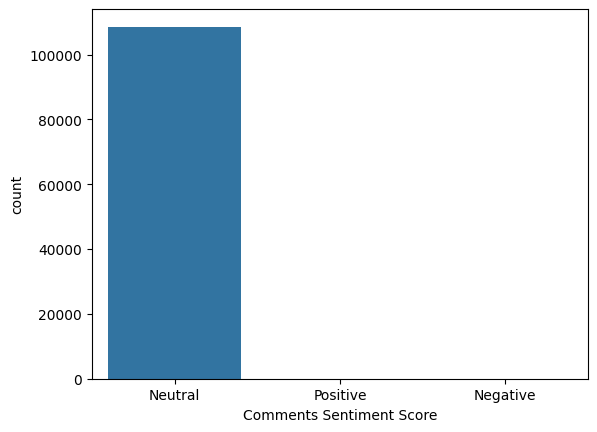

In [ ]:
## Plotting
sns.countplot(x = label)
plt.show()

This barplot explains that the Comment Sentiment Score have prospects that are **neutral** (i.e they do not know if or not they are interested in the program), **positive ** (the prospects are interested) and ** negative** (the prospects are not interested).

The neutral group are highest in number, the positive group follows making the negative group the least in number


The data class is not evenly distributed.

## Oversampling the data to address the class imbalance.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply the Random Oversampling
X_resampled, y_resampled = ros.fit_resample(features, label)

In [ ]:
print("Features before oversampling:", len(features))
print("Features after oversampling:", len(X_resampled))

Features before oversampling: 108695
Features after oversampling: 325785


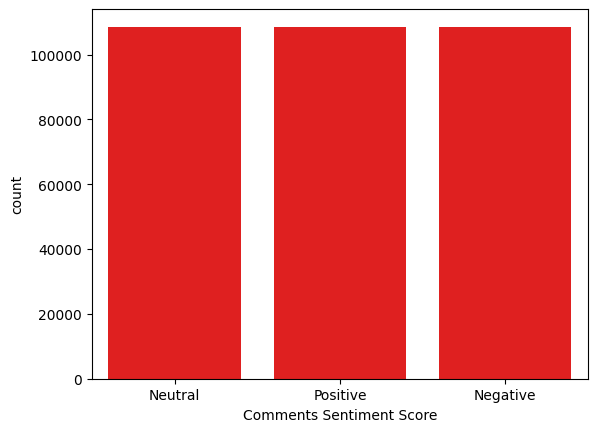

In [ ]:
sns.countplot(x = y_resampled, color = "red")
plt.show()

## Spliting the dataset into training and testing data in a 80:20 ratio

The "Feature" and "Label" datasets are divided into "Training" and "Testing" subsets.

The training dataset comprises 80% of the data, while the testing dataset makes up the remaining 20%.

Training Set: Serves to train the model, enabling it to learn patterns and relationships within the data.

Testing Set: Represents new, unseen data to simulate real-world scenarios, ensuring the model's evaluation is unbiased and its performance is realistic.









In [ ]:
# train_test_split use to split the data
from sklearn.model_selection import train_test_split

In [ ]:
# Features : X - variables
# Label = y- Variables
Xtrain, Xtest, ytrain, ytest = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [ ]:
len(Xtrain)

260628

In [ ]:
Xtrain.shape

(260628, 8)

In [ ]:
len(Xtest)

65157

In [ ]:
Xtest.head()

,Gender,Program,Location (Country),Lead Manager,Lead Source,Time_to_Start,Comments Sentiment,Cluster_y
319985,0,0,5,0,0,47,0.285714,2
293984,1,2,3,2,0,19,0.125000,2
136613,1,1,5,3,3,50,-0.200000,2
146821,0,1,4,1,0,19,-0.500000,2
213071,1,1,3,2,0,12,-0.200000,2


**Modeling**

We will start with a logistic regression

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train data has to be scaled so that it brings about standardization of all features reducing the tendency for any one feature dominating others

In [ ]:
## Initialize scaler

scaler = StandardScaler()

In [ ]:
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
### Step 1: Intialize the model

model = LogisticRegression(random_state = 42)

In [ ]:
### Step 2: fit/train the model

model.fit(Xtrain_scaled, ytrain)

LogisticRegression(random_state=42)

In [ ]:
### Step 3: Make Predictions
predictions = model.predict(Xtest_scaled)


**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
report = classification_report(ytest, predictions)
matrix  = confusion_matrix(ytest, predictions)
print (f"classification report\n {report}")

classification report
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     21777
     Neutral       1.00      1.00      1.00     21662
    Positive       1.00      1.00      1.00     21718

    accuracy                           1.00     65157
   macro avg       1.00      1.00      1.00     65157
weighted avg       1.00      1.00      1.00     65157



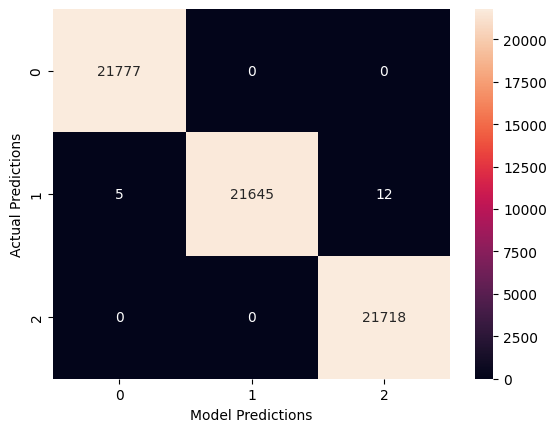

In [ ]:
sns.heatmap(matrix, annot = True, fmt = "g")#fmt = value format, annot = show value, cmap = style)
plt.ylabel("Actual Predictions")
plt.xlabel("Model Predictions")
plt.show()

In [ ]:
# Train and test accuracy comparison
print(f"Training Accuracy: {model.score(Xtrain_scaled, ytrain)}")
print(f"Test Accuracy: {model.score(Xtest_scaled, ytest)}")

Training Accuracy: 0.9945454545454545
Test Accuracy: 1.0


The logistic regression model performance is very good as evaluated by the precision, recall and f1-score evaluation metrics.

The Comment Sentiment Score is represented 0-Negative, 1-Neutral and 2-Positive. The plot tells us that the model predicted 0 truly 4 times, 1 truly 125 times and 2 truly 9 times.

Improving the model's outcome

In [ ]:
# Step 1: Initialize the model
model = LogisticRegression(random_state = 42, class_weight ={0: 0.5, 1: 2, 2: 3})
# Assuming:
# 0 represents "Neutral"
# 1 represents "Positive"
# 2 represents "Negative"
# class 0 (Neutral Sentiment) is the class with more distribution and has been appointed the least class weight
# class 1 (Positive Sentiment) is the class with more distribution and has been appointed the least class weight

#Step 2: Fit/train the model
model.fit (Xtrain_scaled, ytrain)

# Step 3: make predictions
predictions = model.predict(Xtest_scaled)

In [ ]:
# Train and test accuracy comparison
print(f"Training Accuracy: {model.score(Xtrain_scaled, ytrain)}")
print(f"Test Accuracy: {model.score(Xtest_scaled, ytest)}")

Training Accuracy: 0.9927272727272727
Test Accuracy: 1.0


Training accuracy of 99.27% and test accuracy of 1.0% indicate that the model is performing well on both the training and test sets.

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       125
           2       1.00      1.00      1.00         9

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



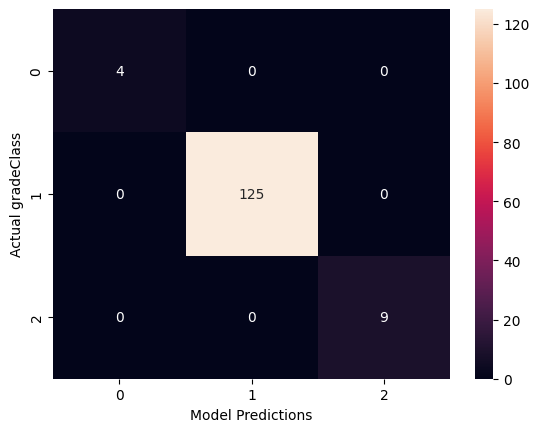

In [ ]:
creport = classification_report(ytest, predictions)
matrix  = confusion_matrix(ytest, predictions)
print(f'Classification Report\n {creport}')
sns.heatmap(matrix, annot=True, fmt= "g")
plt.ylabel("Actual gradeClass")
plt.xlabel("Model Predictions")
plt.show()

**Can a better step be taken?**

**To achieve even better results, i will be employing other models**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
### Initialize and train the models
classifiers = [
               [SGDClassifier(random_state=42, class_weight= {0:2}), "SGD Classifiers"],
               [DecisionTreeClassifier(random_state=42, class_weight = "balanced"), "Decision Tree"],
               [RandomForestClassifier(random_state=42, class_weight = "balanced"), "Random Forest"],
]

In [ ]:
for classifier in classifiers:
     print(classifier[0])

SGDClassifier(class_weight={0: 2}, random_state=42)
DecisionTreeClassifier(class_weight='balanced', random_state=42)
RandomForestClassifier(class_weight='balanced', random_state=42)


In [ ]:
for classifier in classifiers:
     print(classifier[1])

SGD Classifiers
Decision Tree
Random Forest


model = SGD Classifiers
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       125
           2       1.00      1.00      1.00         9

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



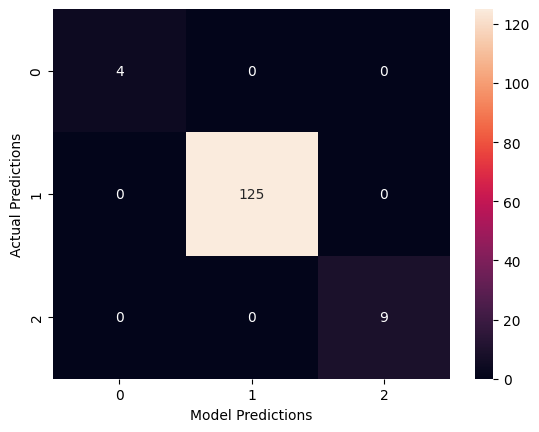

model = Decision Tree
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       125
           2       1.00      1.00      1.00         9

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



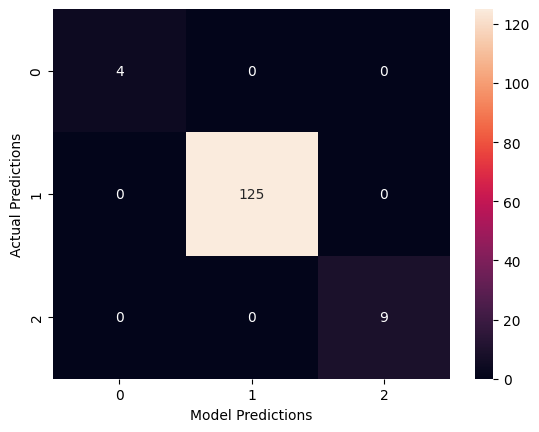

model = Random Forest
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       125
           2       1.00      1.00      1.00         9

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



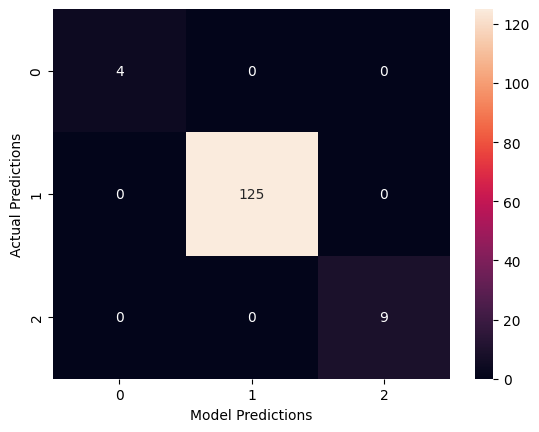

In [ ]:
for classifier in classifiers:
     model = classifier[0]
     model_name = classifier[1]
     print(f"model = {model_name}")
     model.fit(Xtrain_scaled, ytrain)
     predictions = model.predict(Xtest_scaled)
     report = classification_report(ytest, predictions)
     matrix = confusion_matrix(ytest, predictions)
     print(f"classification report\n {report}")
     sns.heatmap(matrix, annot = True, fmt = "g")
     plt.ylabel("Actual Predictions")
     plt.xlabel("Model Predictions")
     plt.show()


All the other models employed are doing exclusively well but i will be going for the RandomForestClassifier because the techniques and results i need to use to achieve.

**Significant features**


  To identify the features that will enhance the model's performance




classifiers[0] contains the SGDClassifier and its name.

classifiers[1] contains the DecisionTreeClassifier and its name.

classifiers[2] contains the RandomForestClassifier and its name.

Therefore, feature_importances = classifiers[2][0].feature_importances_ is accessing the feature importances from the RandomForestClassifier.

In [ ]:
feature_importances = classifiers[2][0].feature_importances_

In [ ]:
feature_importances

array([0.01764102, 0.03400367, 0.02770306, 0.04158749, 0.03923866,
       0.09365819, 0.74616791])

In [ ]:
feature_names = features.columns
feature_names

Index(['Gender', 'Department', 'Location (Country)', 'Lead Manager',
       'Lead Source', 'engagement_gap_days', 'Comments Sentiment'],
      dtype='object')

In [ ]:
feature_importances_df = pd.DataFrame({"Features": feature_names, "Importances" : feature_importances})
feature_importances_df

,Features,Importances
0,Gender,0.017641
1,Department,0.034004
2,Location (Country),0.027703
3,Lead Manager,0.041587
4,Lead Source,0.039239
5,engagement_gap_days,0.093658
6,Comments Sentiment,0.746168


In [ ]:
feature_importances_df= feature_importances_df.sort_values(by = "Importances",ascending= False)
feature_importances_df

,Features,Importances
6,Comments Sentiment,0.746168
5,engagement_gap_days,0.093658
3,Lead Manager,0.041587
4,Lead Source,0.039239
1,Department,0.034004
2,Location (Country),0.027703
0,Gender,0.017641


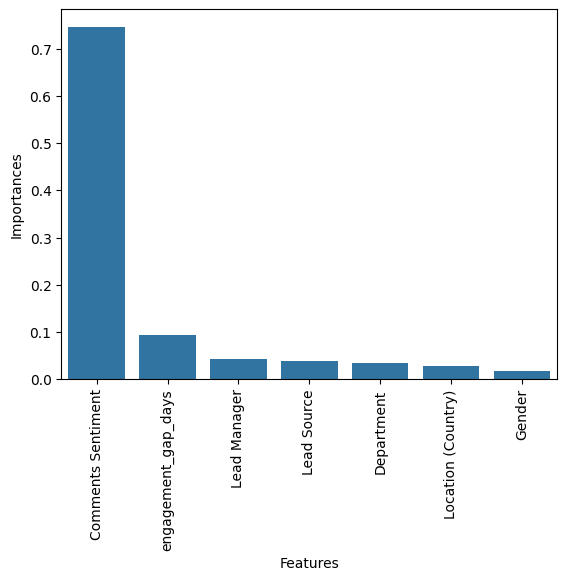

In [ ]:
sns.barplot(x= feature_importances_df.Features, y = feature_importances_df.Importances)
plt.xticks(rotation = 90)
plt.show()

Comments_Sentiment is the most important feature while gender is the least significant feature and will therefore be excluded to see how the model will improve

In [ ]:
top_Features = feature_importances_df.drop(0, axis =0)
top_Features

,Features,Importances
6,Comments Sentiment,0.746168
5,engagement_gap_days,0.093658
3,Lead Manager,0.041587
4,Lead Source,0.039239
1,Department,0.034004
2,Location (Country),0.027703


This states value-wise how each feature is important. Comment Sentiment has the highest value and location (country) the least value



Have to re-scale and train the top_features again in order to re-evaluate the model. This is done because:

1. To ensure consistency in transformation. I just performed feature_importance and some transformation has taken(gender has been excluded).This chnge should be applied to both my X_train and X_test. Any previous scaling done is no longer valid

2. New subset of features is standardized properly before re-training the model.

3. The model indirectly learns information by re-scaling, then splitting and then transform X_test consistently

In [ ]:
Xtrain[top_Features["Features"].values]

,Comments Sentiment,engagement_gap_days,Lead Manager,Lead Source,Department,Location (Country)
indicated_interest_date,,,,,,
2024-09-19,0.0,132,3,0,0,5
2024-09-12,0.0,125,3,0,2,5
2024-08-22,0.0,44,3,3,2,5
2024-07-21,0.0,135,0,0,2,5
2024-08-15,0.0,97,3,1,0,5
...,...,...,...,...,...,...
2024-08-15,0.0,97,3,1,2,5
2024-09-05,0.0,58,3,0,2,5
2024-10-17,0.0,158,3,3,0,5


In [ ]:
Xtrain_top_Features = Xtrain[top_Features["Features"].values]
Xtest_top_Features = Xtest[top_Features["Features"].values]

In [ ]:
Xtrain_top_scaled = scaler.fit_transform(Xtrain_top_Features)
Xtest_top_scaled = scaler.fit_transform(Xtest_top_Features)

<------SGD Classifiers------>
Training Accuracy: 0.9981818181818182
Test Accuracy: 0.9927536231884058
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.99      1.00      1.00       125
           2       1.00      0.89      0.94         9

    accuracy                           0.99       138
   macro avg       1.00      0.96      0.98       138
weighted avg       0.99      0.99      0.99       138



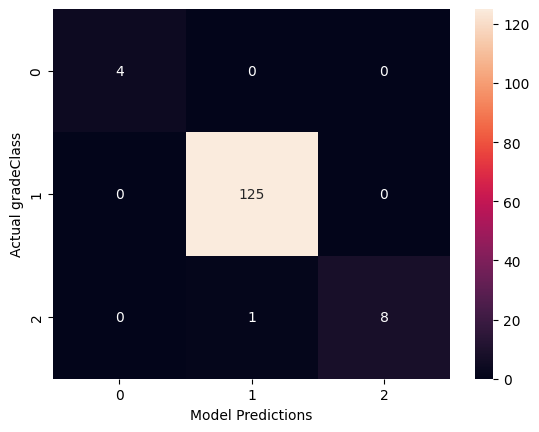

<------Decision Tree------>
Training Accuracy: 1.0
Test Accuracy: 1.0
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       125
           2       1.00      1.00      1.00         9

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



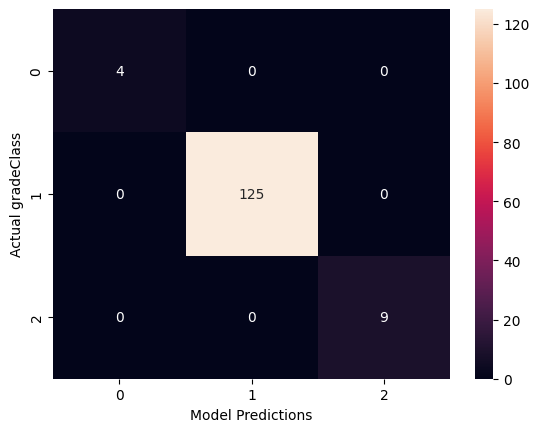

<------Random Forest------>
Training Accuracy: 1.0
Test Accuracy: 1.0
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       125
           2       1.00      1.00      1.00         9

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



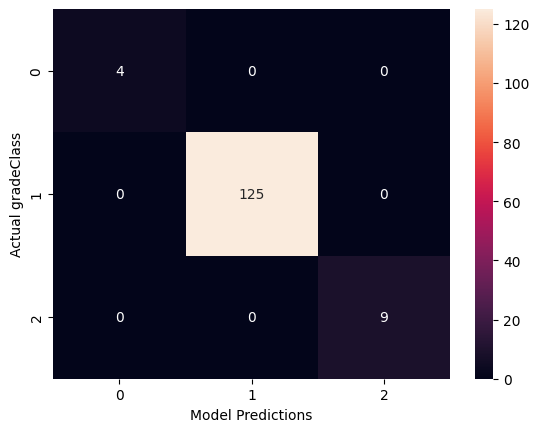

In [ ]:
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f"<------{model_name}------>")
    model.fit (Xtrain_top_scaled , ytrain)
    predictions = model.predict(Xtest_top_scaled)
    # Train and test accuracy comparison
    print(f"Training Accuracy: {model.score(Xtrain_top_scaled, ytrain)}")
    print(f"Test Accuracy: {model.score(Xtest_top_scaled, ytest)}")
    creport = classification_report(ytest, predictions)
    matrix  = confusion_matrix(ytest, predictions)
    print(f'Classification Report\n {creport}')
    sns.heatmap(matrix, annot=True, fmt= "g") #fmt = value format, annot = show value, cmap = style
    plt.ylabel("Actual gradeClass")
    plt.xlabel("Model Predictions")
    plt.show()

Each model gave top_notch performances however RandomForest would be further improved.

**Hyper-parameter Tuning using GridSearchCV**

Hyper-parameter tuning is a crucial step in optimizing machine learning models, and GridSearchCV is one of the most popular techniques for this purpose. In summary, GridSearchCV ensures that the model achieves optimal performance by fine-tuning hyper-parameters in a reliable and systematic way.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the grid of hyper-parameters to search
parameter_grid = {
    "max_depth": [None, 20, 30, 50],
    'min_samples_split': [5, 7, 10],
    "class_weight": [{0: 1, 1: 2, 2: 3}, {0: 1, 1: 3, 2: 2}, {0: 1, 1: 4, 2: 1}] # Define weights for all classes (0, 1, 2)
}

In [ ]:
# Perform GridSearchCV

grid_search = GridSearchCV(estimator =classifiers[2][0], param_grid = parameter_grid, cv= 5 , scoring = "accuracy")

In [ ]:
grid_search.fit(Xtrain_top_scaled , ytrain)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 2, 2: 3},
                                          {0: 1, 1: 3, 2: 2},
                                          {0: 1, 1: 4, 2: 1}],
                         'max_depth': [None, 20, 30, 50],
                         'min_samples_split': [5, 7, 10]},
             scoring='accuracy')

In [ ]:

# Best hyper-parameters
print(f'Best Parameters : {grid_search.best_params_}')
print(f'Best Score : {grid_search.best_score_}')


Best Parameters : {'class_weight': {0: 1, 1: 2, 2: 3}, 'max_depth': None, 'min_samples_split': 5}
Best Score : 0.9963636363636365


In [ ]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(class_weight={0: 1, 1: 2, 2: 3}, min_samples_split=5,
                       random_state=42)

Training Accuracy: 1.0
Test Accuracy: 1.0
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       125
           2       1.00      1.00      1.00         9

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



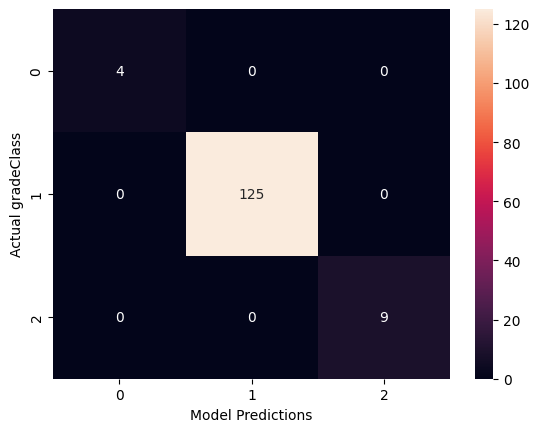

In [ ]:
predictions = best_model.predict(Xtest_top_scaled)
print(f"Training Accuracy: {best_model.score(Xtrain_top_scaled, ytrain)}")
print(f"Test Accuracy: {best_model.score(Xtest_top_scaled, ytest)}")
creport = classification_report(ytest, predictions)
matrix  = confusion_matrix(ytest, predictions)
print(f'Classification Report\n {creport}')
sns.heatmap(matrix, annot=True, fmt= "g")
plt.ylabel("Actual gradeClass")
plt.xlabel("Model Predictions")
plt.show()

The logistic regression model performance is very good as evaluated by the precision, recall and f1-score evaluation metrics. Training and Testing Accuracy is 100 %.

The Comment Sentiment Score is represented 0-Negative, 1-Neutral and 2-Positive. The plot tells us that the model predicted 0 truly 4 times, 1 truly 125 times and 2 truly 9 times.

**Lead Conversion Score**

In [ ]:

# Convert Xtest_top_scaled to a DataFrame to retain feature names for interpretability when adding scores later
Xtest_top_scaled = pd.DataFrame(Xtest_top_scaled)

In [ ]:
#  Train a classification model

model = RandomForestClassifier(random_state=42)
model.fit(Xtrain_top_scaled, ytrain)

RandomForestClassifier(random_state=42)

In [ ]:
#  Get predicted probabilities for all classes. Probabilities indicate how confident the model is about each class

predicted_probabilities = model.predict_proba(Xtest_top_scaled)

In [ ]:
## Define weights for each class

class_weights = {0: 0, 1: 1.5, 2: 2}

In [ ]:
## Calculate weighted lead scores
#Weighted lead score = Sum of (class_probability * class_weight)

lead_scores = np.dot(predicted_probabilities, [class_weights [0], class_weights [1], class_weights [2]])

In [ ]:
## Add the weighted lead scores to the dataset

Xtest_top_scaled["Lead Score"] = lead_scores

In [ ]:
## Rank leads based on the lead score. Higher scores indicate better lead conversion potential

Xtest_top_scaled["Rank"] = Xtest_top_scaled["Lead Score"].rank(ascending=False)



In [ ]:
## Sort leads by their rank
sorted_leads = Xtest_top_scaled.sort_values(by="Lead Score", ascending=False)

In [ ]:
# Assuming Xtest_top_scaled is the DataFrame with a "Lead Score" column

# Calculate percentiles
Xtest_top_scaled['Percentile'] = Xtest_top_scaled['Lead Score'].rank(pct=True) * 100

# Define percentile thresholds for conversion categories
high_threshold = 75  # 75th percentile and above
low_threshold = 25  # 25th to 75th percentile

# Assign conversion categories
Xtest_top_scaled['Conversion Category'] = pd.cut(
    Xtest_top_scaled['Percentile'],
    bins=[0, low_threshold, high_threshold, 100],
    labels=['Low','Medium' ,'High'],
    include_lowest=True
)

# Display the updated DataFrame
print(Xtest_top_scaled[['Lead Score', 'Percentile', 'Conversion Category']])

     Lead Score  Percentile Conversion Category
0         1.500   56.884058              Medium
1         1.500   56.884058              Medium
2         1.500   56.884058              Medium
3         1.500   56.884058              Medium
4         1.460    5.072464                 Low
..          ...         ...                 ...
133       1.860   97.463768                High
134       1.485   15.217391                 Low
135       1.885   99.275362                High
136       1.500   56.884058              Medium
137       1.500   56.884058              Medium

[138 rows x 3 columns]


In [ ]:
# Display of updated DataFrame i.e to display the first 5 features:
print(Xtest_top_scaled[[0, 1, 2, 3, 4, 5,'Lead Score', 'Percentile', 'Conversion Category']])


            0         1         2         3         4         5  Lead Score  \
0   -0.061480  0.495777 -1.152489 -0.762073 -0.195146 -0.680908       1.500   
1   -0.061480  0.832906  0.665151 -0.762073 -0.195146  0.240321       1.500   
2   -0.061480  0.654426  0.665151  1.260352 -1.691262  0.240321       1.500   
3   -0.061480 -1.943447 -1.152489 -0.762073 -0.195146 -0.680908       1.500   
4   -0.061480 -1.943447 -1.152489 -0.762073 -0.195146  0.240321       1.460   
..        ...       ...       ...       ...       ...       ...         ...   
133  2.778455  0.495777 -1.152489 -0.762073 -0.195146  0.240321       1.860   
134 -0.061480 -0.118987  0.665151 -0.762073 -0.195146  0.240321       1.485   
135  3.488439  0.495777 -0.243669 -0.762073  1.300971  0.240321       1.885   
136 -0.061480  0.832906  0.665151  1.260352  1.300971  0.240321       1.500   
137 -0.061480  0.019831  0.665151 -0.762073 -0.195146 -1.602138       1.500   

     Percentile Conversion Category  
0     56.8840

In [ ]:
Xtest_top_scaled.sort_values(by="Lead Score", ascending=False)

,0,1,2,3,4,5,Lead Score,Rank,Percentile,Conversion Category
15,1.358487,-1.170034,0.665151,1.260352,-0.195146,0.240321,1.930,1.0,100.000000,High
135,3.488439,0.495777,-0.243669,-0.762073,1.300971,0.240321,1.885,2.0,99.275362,High
42,2.778455,0.495777,-2.061308,-0.762073,-0.195146,0.240321,1.860,4.5,97.463768,High
133,2.778455,0.495777,-1.152489,-0.762073,-0.195146,0.240321,1.860,4.5,97.463768,High
20,2.210468,0.495777,-2.061308,-0.762073,-0.195146,0.240321,1.860,4.5,97.463768,High
...,...,...,...,...,...,...,...,...,...,...
58,-0.061480,0.654426,0.665151,1.260352,-0.195146,-3.444596,1.395,134.0,3.623188,Low
5,-2.901416,-1.804629,-2.061308,-0.762073,-1.691262,0.240321,0.590,135.0,2.898551,Low
112,-2.368928,0.495777,-0.243669,-0.762073,1.300971,-0.680908,0.540,136.0,2.173913,Low
52,-2.901416,0.634595,-0.243669,-0.762073,-0.195146,-1.602138,0.405,137.0,1.449275,Low


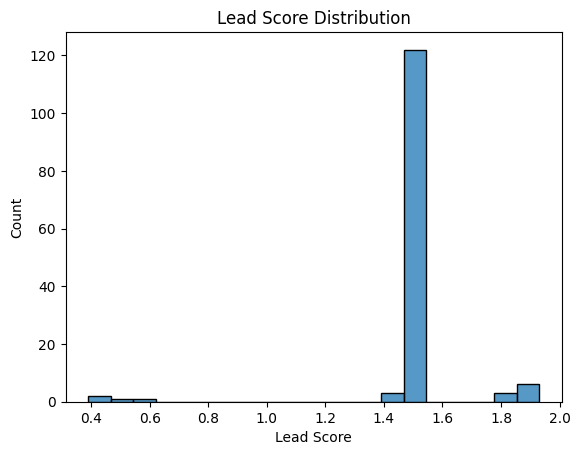

In [ ]:
sns.histplot(Xtest_top_scaled['Lead Score'], bins=20)
plt.title('Lead Score Distribution')
plt.xlabel('Lead Score')
plt.ylabel('Count')
plt.show()

TRANSLATION:

X-axis (Lead Score): This represents the lead score values, typically a numeric measure of how likely a lead is to convert into a paying PROSPECTS. The range (0.4–2.0) suggest a scaling or normalization of scores.

Y-axis (Count): This shows the number of leads that fall into each lead score range.

The spike (i.e high peak) at lead score of 1.5 suggests that many leads are clustered around that score. The distribution is left-skewed (more leads with low scores), indicatING that most leads have a lower likelihood of conversion.

From the plot observations, focusing of sales or marketing efforts should be applied to these segments (such as lead scores of 1.4–1.9) as they’re likely to yield better conversion rates.


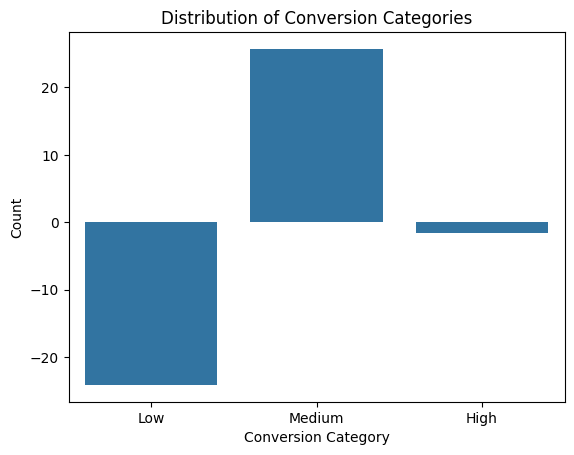

In [ ]:
# Create a countplot
sns.countplot(x='Conversion Category', data=Xtest_top_scaled, order=['Low', 'Medium', 'High'])  # Specify order for x-axis

# Set plot title and labels
plt.title('Distribution of Conversion Categories')
plt.xlabel('Conversion Category')
plt.ylabel('Count')

# Show the plot
plt.show()

TRANSLATION:

X-Axis (Conversion Categories):
The categories (Low, Medium, High) represents the segmentation of leads managers based on their conversion likelihood or performance.
These could correspond to thresholds based on lead scores, engagement_gap_days.

Y-Axis (Count):
The count indicates the frequency of leads to covert prospects in each conversion category.
Negative counts may signify net change (e.g., reductions or losses in conversions) rather than raw counts.

1. Low Category: The count is negative, this might reflect:
a. A reduction in the number of leads classified as low conversion potential.
b. Successful reclassification of low-potential leads to higher categories due to better targeting or intervention strategies.

2. Medium Category: A positive count suggests a growth in medium-converting leads.

3. High Category: Negative counts here could indicate a challenge in maintaining high-potential leads, possibly due to issues like poor follow-up, competition, or declining quality in high-conversion sources.


To explain the key factors driving predictions, explainability techniques or interpretability tools is employed.

I will be employing the **SHAP (SHapley Additive exPlanations)** because it provides **global explanations** (e.g, which features drive the model overall) and **local explanations** (e.g, why a single prediction was made).

I will be employing** Feature Importance from Tree-Based Models**because it is simple and intuitive for understanding which features have the highest influence. It is specific to tree-based models, where importance is calculated based on splits.

Both techniques are useful for non-linear models such as Random Forests.

**Using SHAP (SHapley Additive exPlanations)**

In [ ]:
pip install shap

In [ ]:
import shap
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)


In [ ]:
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)


In [ ]:
# Compute SHAP values
shap_values = explainer(X_test)

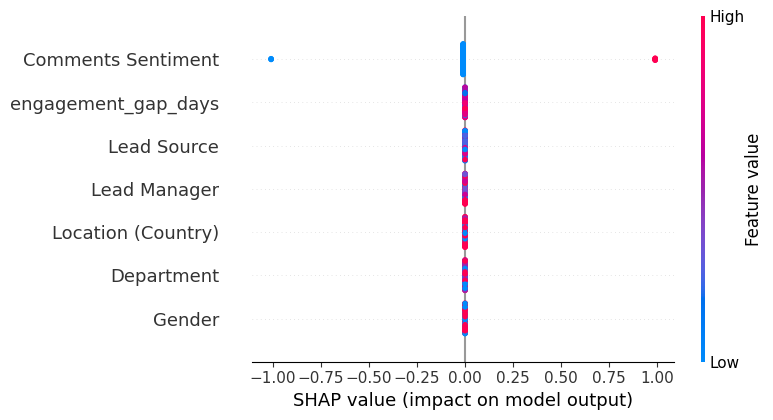

In [ ]:
# Summary plot
shap.summary_plot(shap_values, X_test)


Key Observations:
Feature Importance Order: Features are ranked by importance from top to bottom based on their average absolute SHAP value.The higher a feature appears, the more it influences the model and dominate the predictions. 'Comments Sentiment' feature ranked top and so it is the most importance feature that has influenced the model and dominates its predictions.

SHAP Value Spread (Horizontal axis): This shows how much each feature contributes to the predictions. A wider spread means the feature's influence varies greatly across instances. This can be seen with the feature 'Comments Sentiment'.

Color Encoding (Red/Blue): The color indicates the feature value for each data point:
Red: Higher feature values.
Blue: Lower feature values.

From the red colour seen on 'Comments Sentiment' feature means it has a high values impact and prediction direction (Its spread ends in positive SHAP values).

Further Interpretation:
The 'Comments Sentiment'  feature has a high SHAP values as it's red, it means that prospects with more comments will significantly increase the number of prospects that should be followed up on.
Conversely, if LSTAT (percentage of lower status population) has negative SHAP values wh

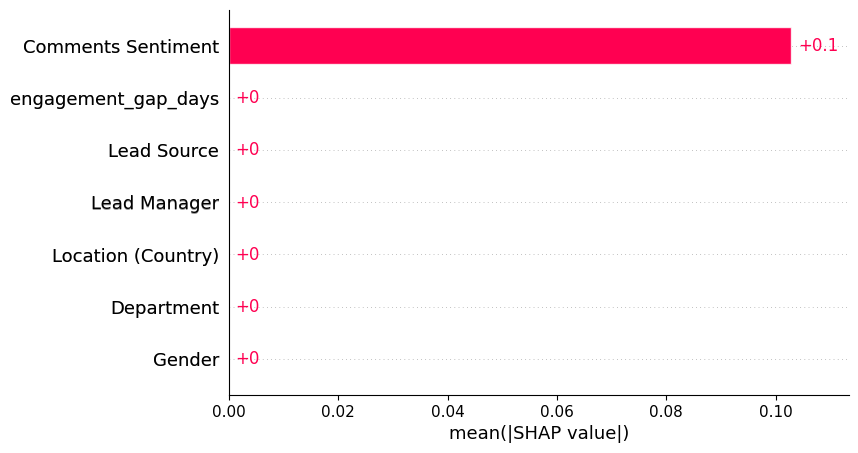

The bar plot (shap.plots.bar) shows the mean absolute SHAP values for each feature, summarizing their overall importance.

##Prescriptive Recommendations


1.**Optimize Lead Manager Performance**

Performance Monitoring: Implement a performance tracking system that records follow-up actions by lead managers (e.g., number of calls/emails sent, response times, conversion outcomes).

Use your model predictions to evaluate each lead manager’s effectiveness, highlighting outliers (both positive and negative).

Accountability Measures: Introduce CRM (Customer Relationship Management) tools such as Salesforce, HubSpot, Zoho CRM, and Microsoft Dynamics 365 that log all interactions between lead managers and leads, ensuring transparency and reducing potential dishonesty.

Training and Feedback: Provide tailored training for underperforming lead managers. Use best practices from top performers to create standardized follow-up protocols.

2. **Improve Follow-Up Strategies**

Reduce Engagement Gaps: Automate follow-ups immediately after webinars to maintain engagement. For example, send personalized emails within 24 hours and schedule follow-up calls within three days.

Sentiment-Based Prioritization: Leads with positive comments should be prioritized for immediate follow-ups, as they are more likely to convert.

Create Multi-Channel Follow-Ups: Use a mix of channels (e.g., email, WhatsApp, LinkedIn) based on lead preferences. For example, leads sourced from LinkedIn may prefer follow-ups on the same platform.

3. **Target High-Converting Segments**

Analyze Lead Sources: Focus marketing efforts on lead sources with historically high conversion rates. For example, from the dataset Facebook leads convert better. The following can be done to improve and maintain it:

i. Expand Ad Budget: Allocate a larger share of the marketing budget to Facebook campaigns, especially for high-performing ad formats like lead forms, video ads, or carousel ads.

ii. Experiment with Ad Types: Test various creatives, including testimonials, program overviews, or webinar highlights, to see what resonates best with your audience.

iii. Leverage Facebook Groups and Communities by
a. Create or Join Niche Groups: Establish a Facebook group for data enthusiasts or professionals (e.g., "Future Data Scientists Network") to foster community engagement and promote your programs subtly.
Participate in relevant groups by sharing valuable insights, responding to questions, and promoting webinars.

b. Host Live Events: Run Facebook Live sessions featuring program alumni, instructors, or career experts to attract and engage potential leads directly on the platform.

iv. Encourage Referrals from Facebook Leads by
a. Referral Incentives: Encourage Facebook leads to refer friends by offering discounts, free webinars, or other incentives.

b. Leverage Social Proof: Share testimonials, certificates, or success stories of participants who came through Facebook to build trust and attract similar leads.

v. Use Facebook Messenger for Direct Engagement by
Automated Messenger Bots: To use Facebook Messenger bots for direct engagement, select a chatbot platform like ManyChat or Chatfuel, link it to your Facebook page, and design workflows to answer FAQs, share webinar schedules, and guide users through registration.

vi. Build Long-Term Engagement by
a. Content Strategy: Regularly post engaging content like tips, tutorials, participant spotlights, and industry insights to keep your audience interested.

b. Retarget Webinar Attendees: To retarget webinar attendees, install Facebook Pixel on key pages, create a custom audience of non-converters, and design ads highlighting program benefits or deadlines. Launch and monitor the campaign to re-engage attendees effectively.


4.** Geographic Customization:**
a. Localized Messaging and Ads: Customize the language, tone, and messaging of campaigns based on the region. For example, create region-specific ads that emphasize local career opportunities and the relevance of the program to that market. Offer regional case studies to enhance program relevance, HOW?

In reference to the result from our datasets we see Nigeria achieving the most(521), South Africa (2), United Kindgom (2)

i. Local Career Opportunities: In Nigeria, there’s increasing demand for data professionals in sectors like fintech, telecommunications, and agriculture. Major Nigerian companies such as Flutterwave, Interswitch, and MTN are looking for skilled data scientists to enhance their operations.

Example Message:
"The Nigerian fintech industry is booming, with companies like Flutterwave and Interswitch actively hiring data scientists to drive innovation. Our Data Science program provides the skills you need to take advantage of the growing opportunities in fintech and telecoms in Nigeria."

Relevance of the Program: The program can highlight skills such as predictive analytics, big data processing, and Python, which are highly valued in the Nigerian tech ecosystem.

Example Message:
"Learn essential skills like Python, machine learning, and data visualization that are crucial for roles in leading Nigerian companies like MTN and Interswitch, which are driving digital transformation in the telecom and financial sectors."

ii. South Africa (Data Science Program)
Local Career Opportunities: In South Africa, industries such as financial services, retail, and agriculture are increasingly relying on data science. Companies like Standard Bank, Naspers, and Woolworths are looking for professionals who can leverage data to improve business processes.

Example Message:
"South Africa's financial sector is growing, with companies like Standard Bank and Naspers seeking talented data scientists. Our Data Science program equips you with the skills needed to thrive in the fast-evolving industries of banking, retail, and e-commerce in South Africa."

Relevance of the Program: Emphasize the skills taught, such as data analysis, machine learning, and predictive modeling, which are directly applicable to industries like finance and retail in South Africa.

Example Message:
"Gain hands-on experience with data analysis and machine learning tools that are essential for top South African companies like Woolworths and Standard Bank, which are harnessing data to enhance customer experiences and streamline operations."

iii. United Kingdom (Data Science Program)
Local Career Opportunities: In the UK, industries like healthcare, finance, and technology are major employers of data science professionals. Leading organizations such as the NHS, Barclays, and tech startups in London are actively recruiting data scientists to harness the power of data.

Example Message:
"The UK's healthcare and financial sectors are increasingly adopting data-driven approaches, with companies like the NHS and Barclays looking for skilled data scientists. Our Data Science program will help you gain the expertise needed to seize these opportunities in the UK."

Relevance of the Program: The program should focus on in-demand skills like machine learning, data ethics, and AI, which are becoming more important in sectors like healthcare (NHS) and finance (Barclays) in the UK.

Example Message:
"Our Data Science program covers AI, machine learning, and ethical data practices, empowering you to excel in the UK's booming healthcare and financial sectors, with major employers like the NHS and Barclays seeking data professionals to drive innovation and improve services."


5.**Gender Inclusivity**: Address potential barriers for underrepresented genders in specific programs as we see in the plot of gender distribution explaining that males are more interested in tech than females. For instance, create women-focused campaigns to promote tech-related courses. I have seen this has been employed as the mission of empowering 4000 women in tech has started.

6.** Align Offerings with Interests**
Program-Specific Insights: The course Data Analysis has the highest number of applications and so it should looked into to identify what drives its popularity? Allocate more resources to promoting this course while investigating barriers or gaps that may be limiting interest or conversions for other programs like Data Science and Business Analysis."

Webinar Content Optimization:
Use attendee feedback and sentiment analysis to refine webinar content. Focus on topics that resonate with leads and emphasize program value propositions.

7. Leverage Predictive Scoring
Lead Prioritization: Use your model to score leads based on their likelihood to convert and create a tiered follow-up strategy:
High-likelihood leads: Immediate and intensive engagement.
Medium-likelihood leads: Regular follow-ups with nurturing content.
Low-likelihood leads: Automated emails with optional human follow-ups.

Churn Prediction: Predict and address potential drop-offs in leads that engage but fail to convert. Offer tailored incentives like discounts or flexible payment plans.

8. Feedback Loop for Continuous Improvement  by

a. Performance Metrics: Regularly track metrics like conversion rate, time-to-convert, and engagement rates per lead manager, lead source, and program.

b. Iterative Model Updates: Continuously refine the predictive model with new data to improve accuracy.

c. A/B Testing: Experiment with follow-up strategies (e.g., email tone, frequency, timing) and measure their impact on conversion rates.





In [ ]:
!jupyter nbconvert --to html MyNotebook.ipynb